# Constructing Quantum Circuits

**Course**: Quantum Computing Laboratory  
**Version**: 2.2 (Qiskit 2.2 Compatible)  
**Last Updated**: November 2025

---

## 📚 Overview

Master the **QuantumCircuit** class - the foundation of all quantum programming in Qiskit. Learn to build, manipulate, and compose quantum circuits.

### Topics Covered:
- QuantumCircuit fundamentals
- Adding gates and operations
- Quantum and classical registers
- Circuit composition and decomposition
- Parameterized circuits
- Custom gates and instructions

## 🎯 Learning Objectives

1. ✅ Understand QuantumCircuit structure
2. ✅ Create circuits with multiple methods
3. ✅ Compose and decompose circuits
4. ✅ Build parameterized circuits
5. ✅ Create custom quantum gates
6. ✅ Apply circuits to real algorithms

In [1]:
# Qiskit 2.2 imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter, ParameterVector
from qiskit.circuit.library import RZGate, CXGate, HGate
from qiskit.visualization import circuit_drawer
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import numpy as np

print("✓ All imports successful!")
print("  Qiskit 2.2 QuantumCircuit ready")

✓ All imports successful!
  Qiskit 2.2 QuantumCircuit ready


## 🔨 Part 1: Circuit Basics

### What is a QuantumCircuit?

In [2]:
# Create a simple 2-qubit circuit
qc = QuantumCircuit(2)

print("Circuit created:")
print(f"  Qubits: {qc.qubits}")
print(f"  Number of qubits: {qc.num_qubits}")
print(f"  Classical bits: {qc.clbits}")
print(f"  Number of classical bits: {qc.num_clbits}")

Circuit created:
  Qubits: [<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>]
  Number of qubits: 2
  Classical bits: []
  Number of classical bits: 0


### Adding Gates

Circuit data:
  Instructions: 3
  Depth: 1
  Gate count: 2


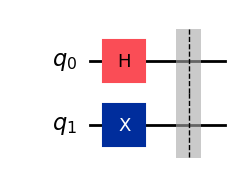

In [3]:
# Add gates to circuit
qc.h(0)  # Hadamard on qubit 0
qc.x(1)  # X-gate on qubit 1
qc.barrier()  # Visual separator

print("Circuit data:")
print(f"  Instructions: {len(qc.data)}")
print(f"  Depth: {qc.depth()}")
print(f"  Gate count: {qc.size()}")

# Visualize
qc.draw('mpl')

### Circuit Instructions

In [4]:
# Inspect circuit instructions
print("Circuit instructions:")
for i, instruction in enumerate(qc.data):
    print(f"  {i}: {instruction.operation.name} on qubits {instruction.qubits}")

# Get specific instruction
first_gate = qc.data[0]
print(f"\nFirst gate: {first_gate.operation.name}")
print(f"  Applied to: {first_gate.qubits}")

Circuit instructions:
  0: h on qubits (<Qubit register=(2, "q"), index=0>,)
  1: x on qubits (<Qubit register=(2, "q"), index=1>,)
  2: barrier on qubits (<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>)

First gate: h
  Applied to: (<Qubit register=(2, "q"), index=0>,)


## 🧩 Part 2: Registers

### Using QuantumRegister and ClassicalRegister

Circuit with named registers:
  Quantum registers: [QuantumRegister(2, 'alice'), QuantumRegister(2, 'bob')]
  Classical registers: [ClassicalRegister(2, 'result')]
  Total qubits: 4


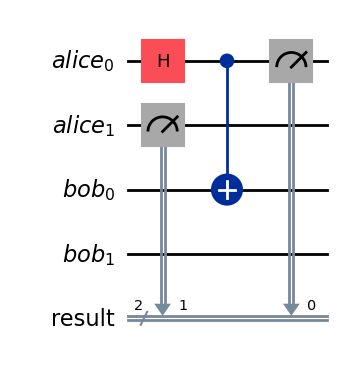

In [5]:
# Create named registers
qr1 = QuantumRegister(2, 'alice')
qr2 = QuantumRegister(2, 'bob')
cr = ClassicalRegister(2, 'result')

# Create circuit with registers
qc_reg = QuantumCircuit(qr1, qr2, cr)

print("Circuit with named registers:")
print(f"  Quantum registers: {qc_reg.qregs}")
print(f"  Classical registers: {qc_reg.cregs}")
print(f"  Total qubits: {qc_reg.num_qubits}")

# Add operations
qc_reg.h(qr1[0])
qc_reg.cx(qr1[0], qr2[0])
qc_reg.measure(qr1, cr)

qc_reg.draw('mpl')

### Multiple Classical Registers

Multiple classical registers:


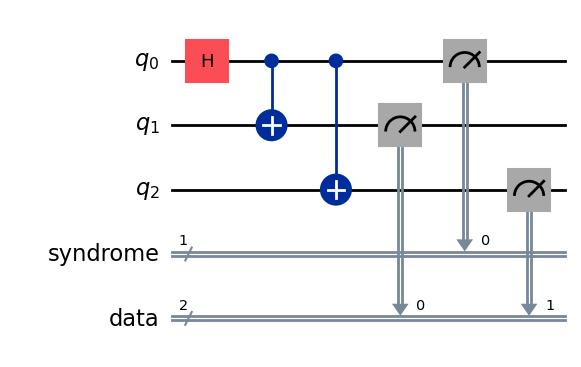

In [6]:
# Multiple classical registers for different measurements
qr = QuantumRegister(3, 'q')
cr1 = ClassicalRegister(1, 'syndrome')
cr2 = ClassicalRegister(2, 'data')

qc_multi = QuantumCircuit(qr, cr1, cr2)

# Example: error correction syndrome measurement
qc_multi.h(0)
qc_multi.cx(0, 1)
qc_multi.cx(0, 2)
qc_multi.measure(qr[0], cr1[0])  # Syndrome
qc_multi.measure(qr[1:3], cr2)  # Data

print("Multiple classical registers:")
qc_multi.draw('mpl')

## 🔄 Part 3: Circuit Composition

### Building Modular Circuits

Composed circuit:


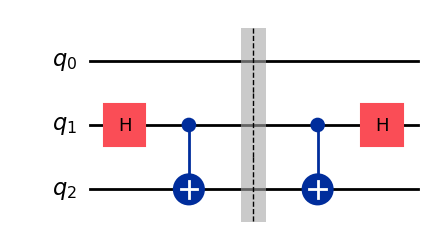

In [7]:
# Create sub-circuits
bell_pair = QuantumCircuit(2, name='Bell')
bell_pair.h(0)
bell_pair.cx(0, 1)

teleport = QuantumCircuit(3, name='Teleport')
teleport.cx(1, 2)
teleport.h(1)

# Compose circuits
full_circuit = QuantumCircuit(3)
full_circuit.compose(bell_pair, qubits=[1, 2], inplace=True)
full_circuit.barrier()
full_circuit.compose(teleport, inplace=True)

print("Composed circuit:")
full_circuit.draw('mpl')

### Tensor Product of Circuits

Tensor product:
  qc1 ⊗ qc2 creates 2-qubit circuit


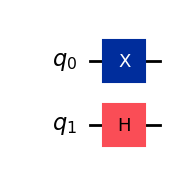

In [8]:
# Create two independent circuits
qc1 = QuantumCircuit(1)
qc1.h(0)

qc2 = QuantumCircuit(1)
qc2.x(0)

# Tensor product (parallel composition)
qc_tensor = qc1.tensor(qc2)

print("Tensor product:")
print(f"  qc1 ⊗ qc2 creates {qc_tensor.num_qubits}-qubit circuit")
qc_tensor.draw('mpl')

## 🎛️ Part 4: Parameterized Circuits

### Using Parameters

Parameterized circuit:
  Parameters: ParameterView([Parameter(θ), Parameter(φ)])
  Number of parameters: 2


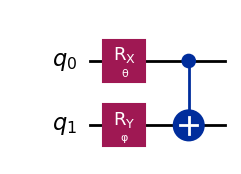

In [9]:
# Create parameterized circuit
theta = Parameter('θ')
phi = Parameter('φ')

qc_param = QuantumCircuit(2)
qc_param.rx(theta, 0)
qc_param.ry(phi, 1)
qc_param.cx(0, 1)

print("Parameterized circuit:")
print(f"  Parameters: {qc_param.parameters}")
print(f"  Number of parameters: {qc_param.num_parameters}")
qc_param.draw('mpl')

### Binding Parameters

Circuit with bound parameters:
  Remaining parameters: ParameterView([])


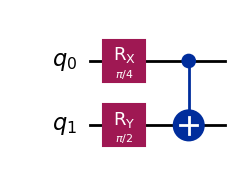

In [10]:
# Bind specific values
qc_bound = qc_param.assign_parameters({theta: np.pi/4, phi: np.pi/2})

print("Circuit with bound parameters:")
print(f"  Remaining parameters: {qc_bound.parameters}")
qc_bound.draw('mpl')

### Parameter Vectors

Circuit with parameter vector:
  Parameters: ParameterView([ParameterVectorElement(p[0]), ParameterVectorElement(p[1]), ParameterVectorElement(p[2]), ParameterVectorElement(p[3])])


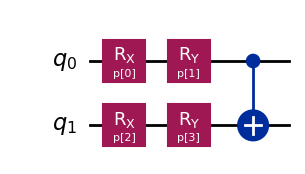

In [11]:
# Create parameter vector
params = ParameterVector('p', 4)

qc_vec = QuantumCircuit(2)
qc_vec.rx(params[0], 0)
qc_vec.ry(params[1], 0)
qc_vec.rx(params[2], 1)
qc_vec.ry(params[3], 1)
qc_vec.cx(0, 1)

print("Circuit with parameter vector:")
print(f"  Parameters: {qc_vec.parameters}")
qc_vec.draw('mpl')

## 🏗️ Part 5: Custom Gates

### Creating Custom Gates

Circuit with custom gate:


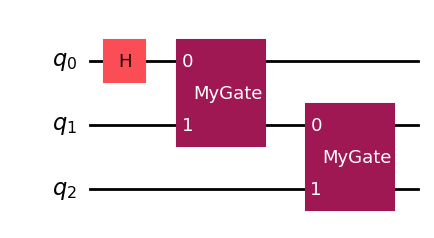

In [12]:
# Define custom gate as a circuit
def create_custom_gate():
    qc = QuantumCircuit(2, name='MyGate')
    qc.h(0)
    qc.cx(0, 1)
    qc.rz(np.pi/4, 1)
    qc.cx(0, 1)
    return qc.to_gate()

# Create the gate
my_gate = create_custom_gate()

# Use custom gate
qc_custom = QuantumCircuit(3)
qc_custom.h(0)
qc_custom.append(my_gate, [0, 1])
qc_custom.append(my_gate, [1, 2])

print("Circuit with custom gate:")
qc_custom.draw('mpl')

### Decomposing Custom Gates

Decomposed circuit:
  Original depth: 3
  Decomposed depth: 9


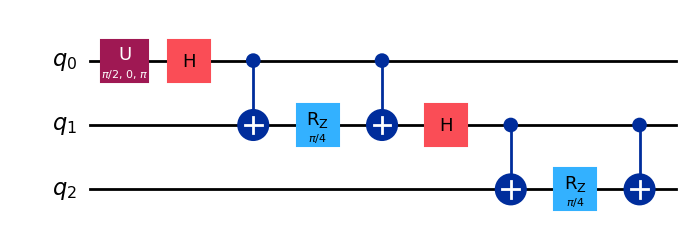

In [13]:
# Decompose custom gate
qc_decomposed = qc_custom.decompose()

print("Decomposed circuit:")
print(f"  Original depth: {qc_custom.depth()}")
print(f"  Decomposed depth: {qc_decomposed.depth()}")
qc_decomposed.draw('mpl')

## 🔬 Part 6: Circuit Execution

### Simulating Circuits

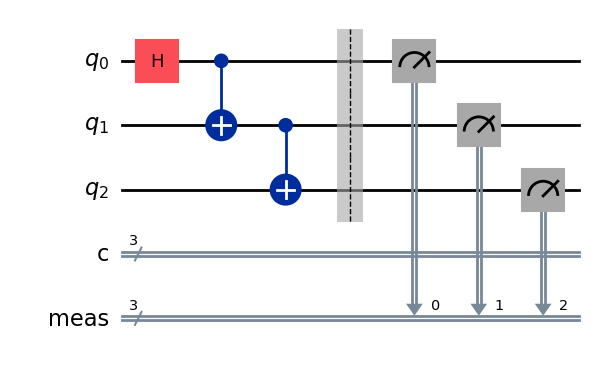

In [17]:
from qiskit.visualization import plot_histogram

# Create example circuit
qc_sim = QuantumCircuit(3, 3)
qc_sim.h(0)
qc_sim.cx(0, 1)
qc_sim.cx(1, 2)
qc_sim.measure_all()
qc_sim.draw('mpl')

In [18]:
# Simulate
simulator = AerSimulator()
sampler = SamplerV2()
pm = generate_preset_pass_manager(optimization_level=1, backend=simulator)
transpiled = pm.run(qc_sim)

job = sampler.run([transpiled], shots=1024)
result = job.result()
print(result[0])

SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=3>), meas=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'shots': 1024, 'circuit_metadata': {}, 'simulator_metadata': {'time_taken_parameter_binding': 1.5788e-05, 'time_taken_execute': 0.011580254, 'omp_enabled': True, 'max_gpu_memory_mb': 0, 'max_memory_mb': 15835, 'parallel_experiments': 1}})


Simulation results:


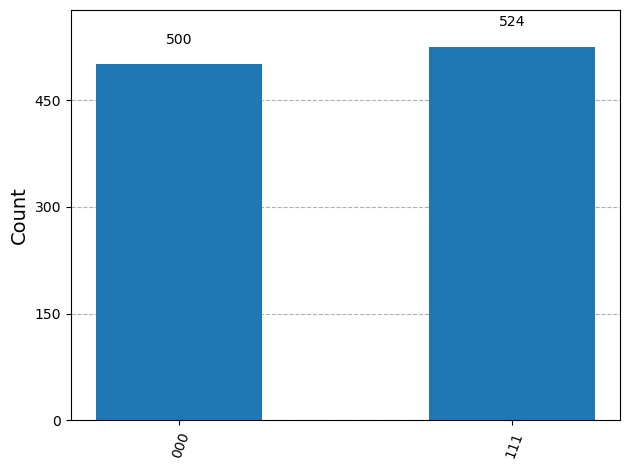

In [21]:
counts = result[0].data.meas.get_counts()
#counts = result[0].data.c.get_counts()

print("Simulation results:")
plot_histogram(counts)

## 📊 Part 7: Circuit Analysis

### Circuit Properties

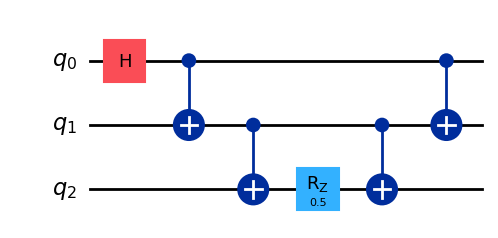

In [23]:
# Analyze circuit
qc_analyze = QuantumCircuit(3)
qc_analyze.h(0)
qc_analyze.cx(0, 1)
qc_analyze.cx(1, 2)
qc_analyze.rz(0.5, 2)
qc_analyze.cx(1, 2)
qc_analyze.cx(0, 1)
qc_analyze.draw('mpl')

In [22]:
print("Circuit Analysis:")
print("="*60)
print(f"  Total qubits: {qc_analyze.num_qubits}")
print(f"  Depth: {qc_analyze.depth()}")
print(f"  Size (gates): {qc_analyze.size()}")
print(f"  Width: {qc_analyze.width()}")
print(f"  Number of nonlocal gates: {qc_analyze.num_nonlocal_gates()}")
print("="*60)

# Count operations
ops = qc_analyze.count_ops()
print("\nOperation counts:")
for gate, count in ops.items():
    print(f"  {gate}: {count}")

Circuit Analysis:
  Total qubits: 3
  Depth: 6
  Size (gates): 6
  Width: 3
  Number of nonlocal gates: 4

Operation counts:
  cx: 4
  h: 1
  rz: 1


## 🎓 Practical Examples

### Example 1: GHZ State

4-qubit GHZ state:


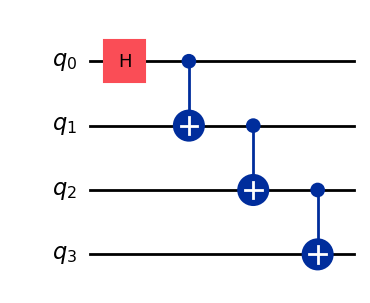

In [24]:
def create_ghz(n_qubits):
    """Create n-qubit GHZ state."""
    qc = QuantumCircuit(n_qubits, name=f'GHZ_{n_qubits}')
    qc.h(0)
    for i in range(n_qubits - 1):
        qc.cx(i, i + 1)
    return qc

# Create 4-qubit GHZ
ghz4 = create_ghz(4)
print("4-qubit GHZ state:")
ghz4.draw('mpl')

### Example 2: Quantum Fourier Transform

3-qubit QFT:


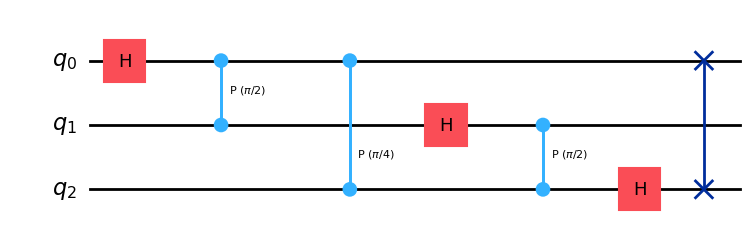

In [25]:
def qft(n):
    """Create n-qubit QFT circuit."""
    qc = QuantumCircuit(n, name=f'QFT_{n}')
    
    for j in range(n):
        qc.h(j)
        for k in range(j+1, n):
            qc.cp(np.pi/2**(k-j), k, j)
    
    # Swap qubits
    for i in range(n//2):
        qc.swap(i, n-i-1)
    
    return qc

# Create 3-qubit QFT
qft3 = qft(3)
print("3-qubit QFT:")
qft3.draw('mpl')

### Example 3: Variational Circuit

Variational circuit with 12 parameters:


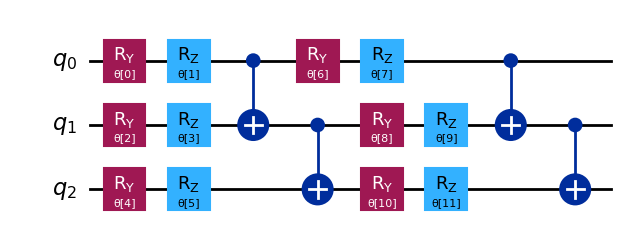

In [26]:
def variational_circuit(n_qubits, n_layers):
    """Create parameterized variational circuit."""
    n_params = 2 * n_qubits * n_layers
    params = ParameterVector('θ', n_params)
    
    qc = QuantumCircuit(n_qubits)
    param_idx = 0
    
    for layer in range(n_layers):
        # Rotation layer
        for qubit in range(n_qubits):
            qc.ry(params[param_idx], qubit)
            param_idx += 1
            qc.rz(params[param_idx], qubit)
            param_idx += 1
        
        # Entangling layer
        for qubit in range(n_qubits - 1):
            qc.cx(qubit, qubit + 1)
    
    return qc

# Create variational circuit
var_qc = variational_circuit(3, 2)
print(f"Variational circuit with {var_qc.num_parameters} parameters:")
var_qc.draw('mpl')

## 🎓 Exercises

### Exercise 1: Bell States (Easy)
Create all four Bell states (Φ+, Φ-, Ψ+, Ψ-) as separate circuits.

```python
# Your solution here
```

### Exercise 2: Custom Toffoli (Medium)
Build a Toffoli (CCX) gate using only single-qubit gates and CNOT. Verify it works correctly.

### Exercise 3: Quantum Adder (Hard)
Implement a 2-bit quantum adder circuit that adds two 2-bit numbers.

## 📖 References

### Documentation
1. **QuantumCircuit API**: https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit
2. **Circuit Library**: https://docs.quantum.ibm.com/api/qiskit/circuit_library
3. **Circuit Composition**: https://docs.quantum.ibm.com/guides/construct-circuits

---

**Course**: Quantum Computing Laboratory  
**License**: MIT  
**Version**: 2.2.0  
**Last Updated**: November 2025